In [1]:
#load libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

In [2]:
covid_df = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv", low_memory = False)

In [3]:
covid_df.columns #column names

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [4]:
covid_df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [5]:
covid_df.shape

(40911354, 19)

In [6]:
#data cleaning
covid_df['case_month'] = pd.to_datetime(covid_df['case_month']) #convert to date

In [7]:
covid_df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-11-01,PA,42.0,UNION,42119.0,65+ years,NaN,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,NaN,NaN
1,2021-09-01,FL,12.0,BREVARD,12009.0,18 to 49 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
2,2021-09-01,GA,13.0,FORSYTH,13117.0,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
3,2021-09-01,CA,6.0,PLACER,6061.0,18 to 49 years,Female,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,Missing,NaN
4,2021-10-01,MT,30.0,YELLOWSTONE,30111.0,18 to 49 years,Female,Unknown,Unknown,NaN,NaN,Missing,Missing,Probable Case,Missing,No,Missing,No,NaN


In [8]:
covid_df.sample(10, random_state = 42)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
10602446,2020-12-01,IL,17.0,KANE,17089.0,65+ years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
26170643,2020-05-01,CA,6.0,LOS ANGELES,6037.0,50 to 64 years,Female,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,NaN,NaN
39032422,2020-08-01,TN,47.0,FRANKLIN,47051.0,NaN,NaN,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,No,NaN,Yes
24332439,2020-10-01,WI,55.0,NaN,NaN,50 to 64 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN
26626073,2021-08-01,KY,21.0,NaN,NaN,0 - 17 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Laboratory reported,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
15859259,2020-10-01,PA,42.0,PHILADELPHIA,42101.0,50 to 64 years,Female,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,Unknown,NaN
15863464,2020-07-01,DE,10.0,NEW CASTLE,10003.0,18 to 49 years,Male,Missing,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
14278929,2021-08-01,SC,45.0,CHARLESTON,45019.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
33212886,2020-08-01,TN,47.0,HICKMAN,47081.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Asymptomatic,No,No,No,NaN
12418197,2021-09-01,FL,12.0,ORANGE,12095.0,18 to 49 years,Female,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN


In [9]:
covid_df.describe(include = 'all',datetime_is_numeric=True) #describe and include string columns

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
count,40911342,40910334,4.091033e+07,38059318,3.805932e+07,40453197,39647723,34563275,33360421,1.398153e+07,1.983767e+07,40911354,40911354,40911354,40911354,40911354,40911354,38981818,2345131
unique,NaN,54,NaN,1069,NaN,5,5,8,4,NaN,NaN,12,3,2,5,4,5,4,2
top,NaN,CA,NaN,LOS ANGELES,NaN,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Yes
freq,NaN,5131301,NaN,1532007,NaN,21181677,20578275,20285241,19620018,NaN,NaN,38870078,37288924,35642164,18695155,17107618,34789115,18901568,2302716
mean,2021-02-11 00:43:39.226181888,NaN,2.595018e+01,NaN,2.583948e+04,NaN,NaN,NaN,NaN,1.998408e-01,8.112484e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020-01-01 00:00:00,NaN,1.000000e+00,NaN,1.001000e+03,NaN,NaN,NaN,NaN,-8.500000e+01,-5.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020-11-01 00:00:00,NaN,1.200000e+01,NaN,1.203100e+04,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-01-01 00:00:00,NaN,2.600000e+01,NaN,2.605900e+04,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-08-01 00:00:00,NaN,3.900000e+01,NaN,3.904900e+04,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021-12-01 00:00:00,NaN,7.800000e+01,NaN,5.604100e+04,NaN,NaN,NaN,NaN,1.000000e+02,9.200000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


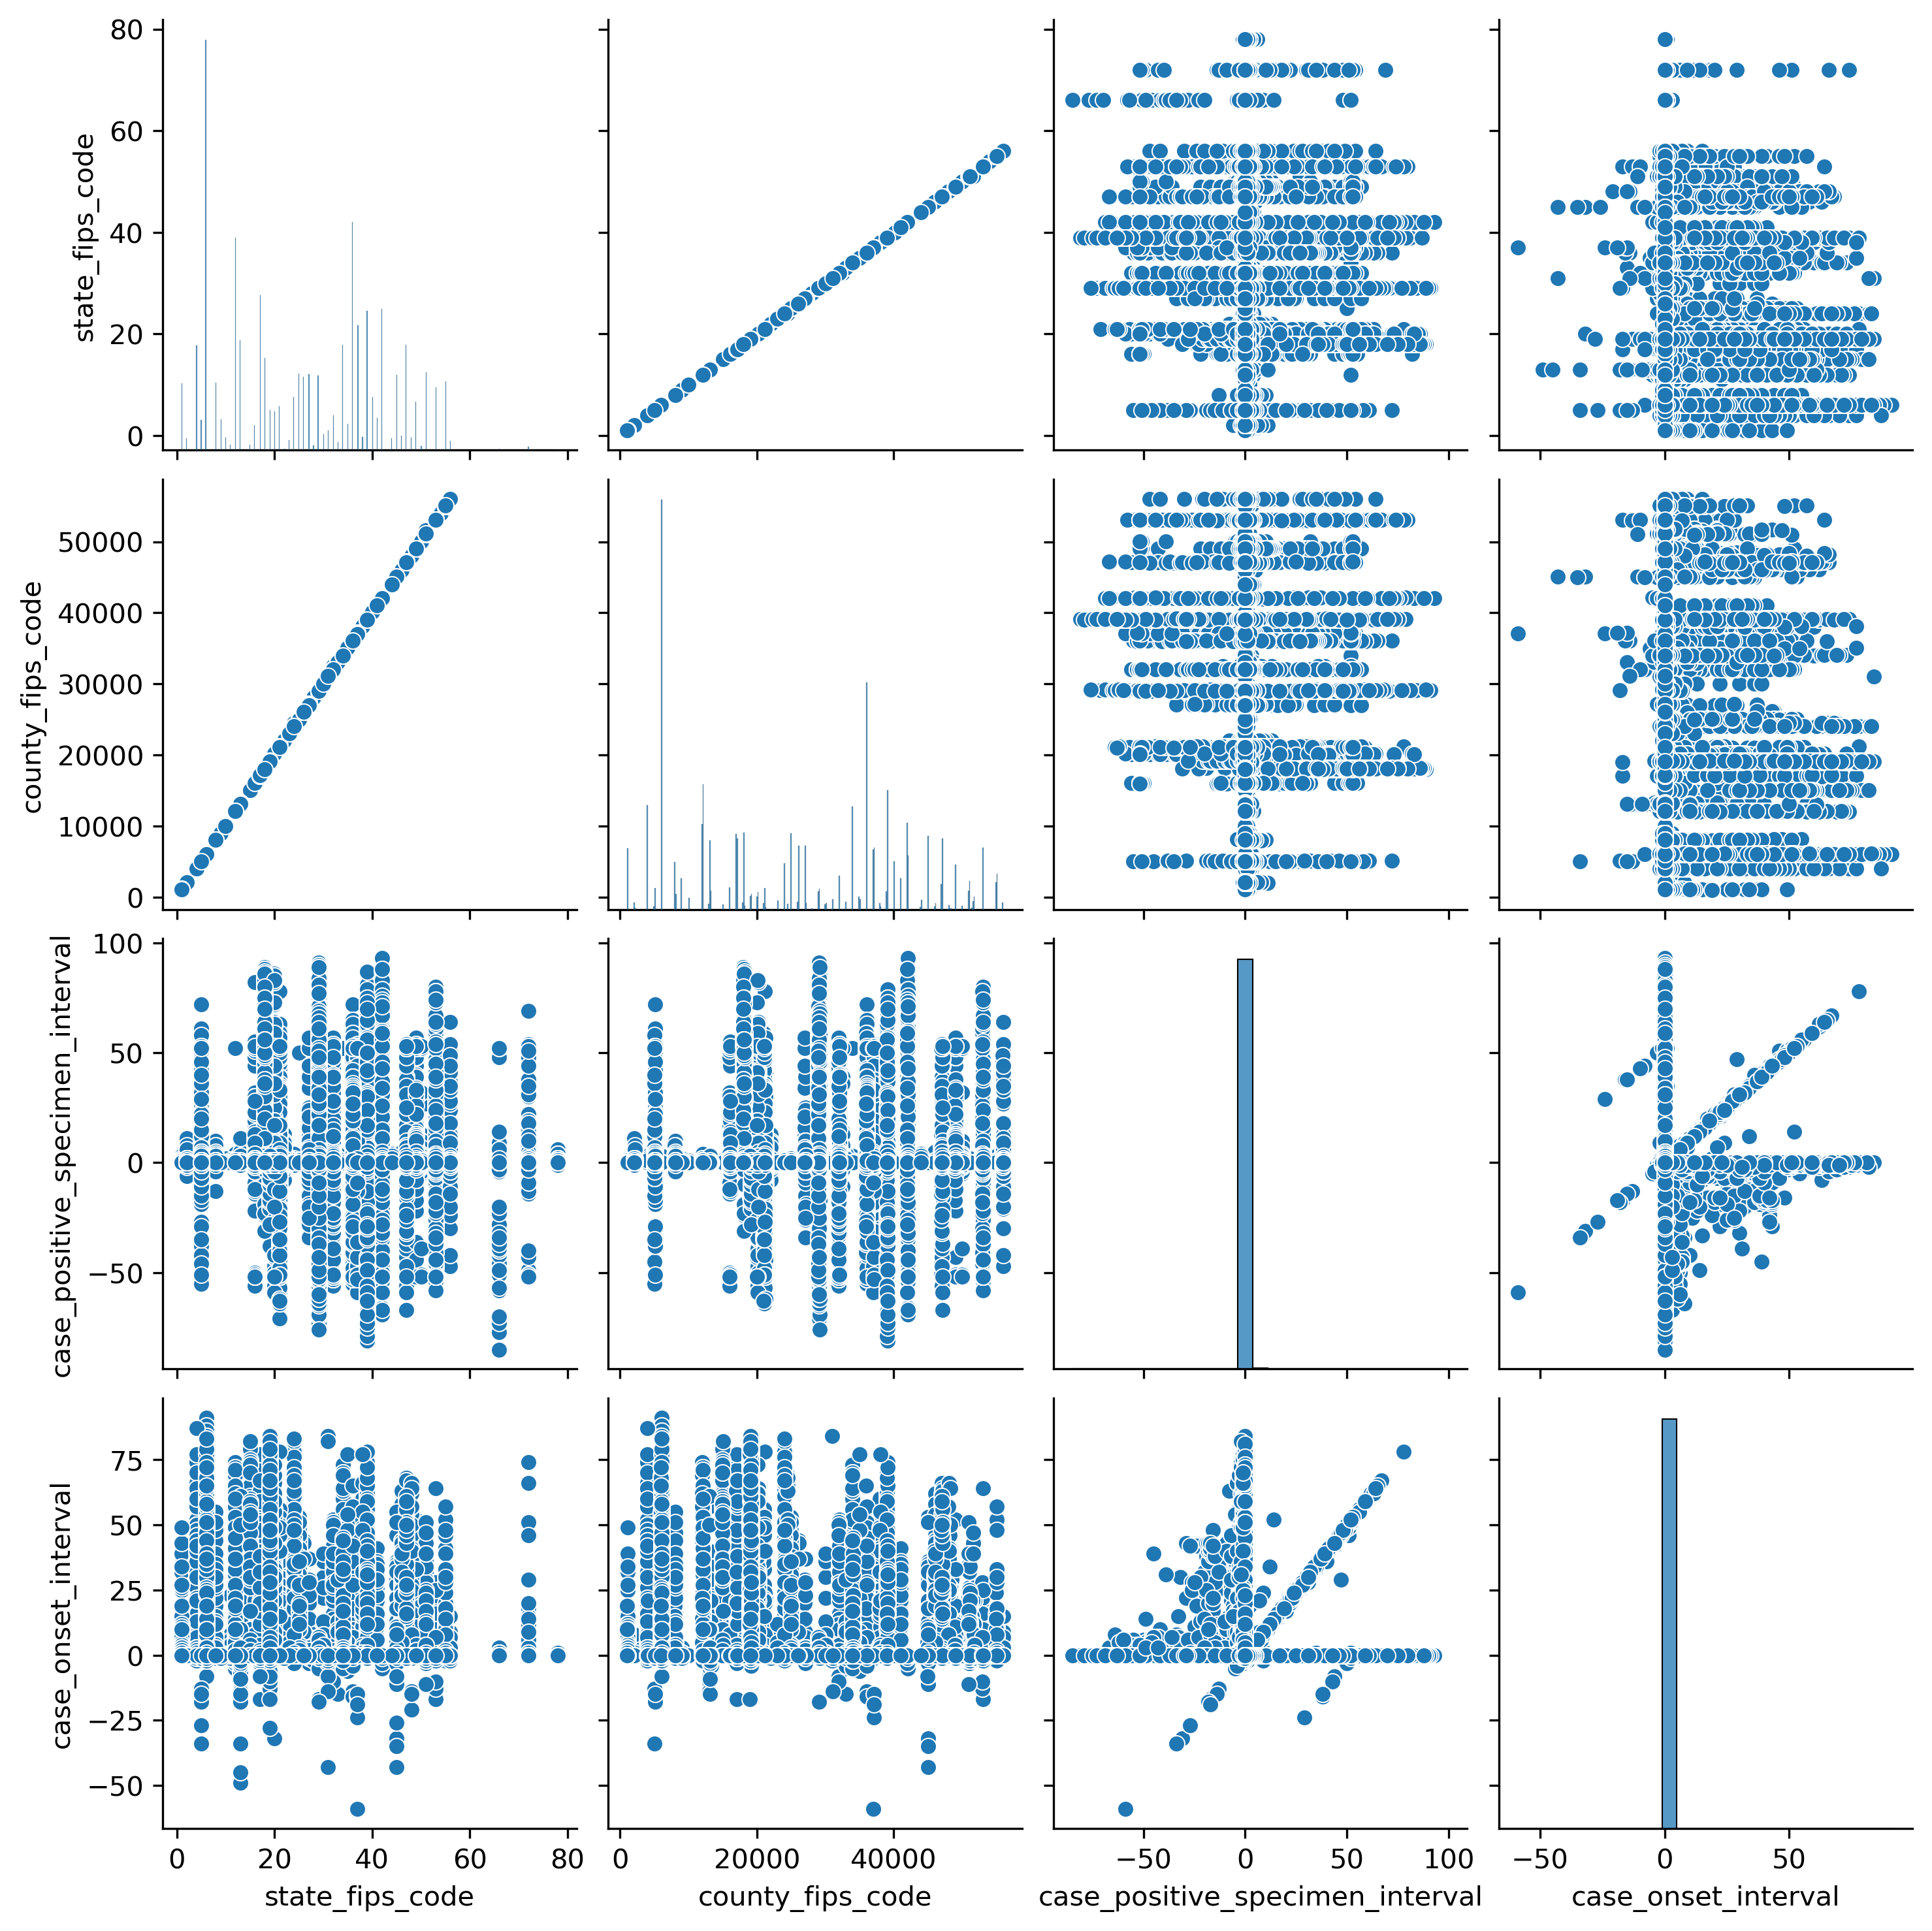

In [10]:
sns.pairplot(covid_df)

<AxesSubplot:>

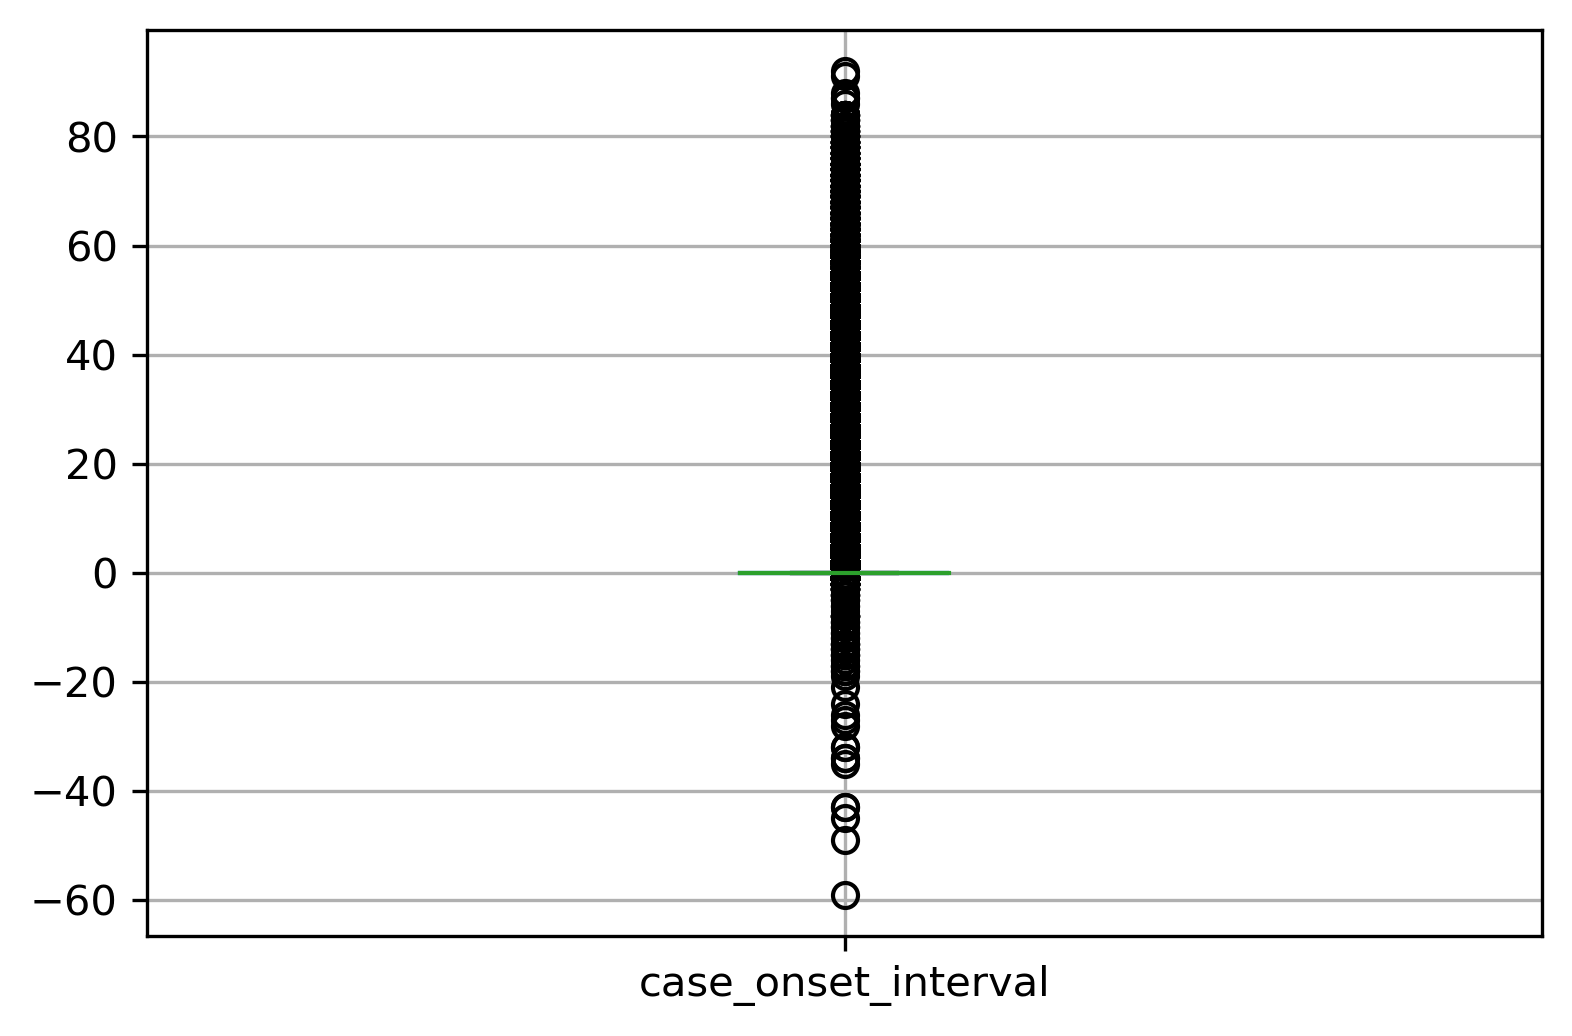

In [11]:
covid_df.boxplot('case_onset_interval')

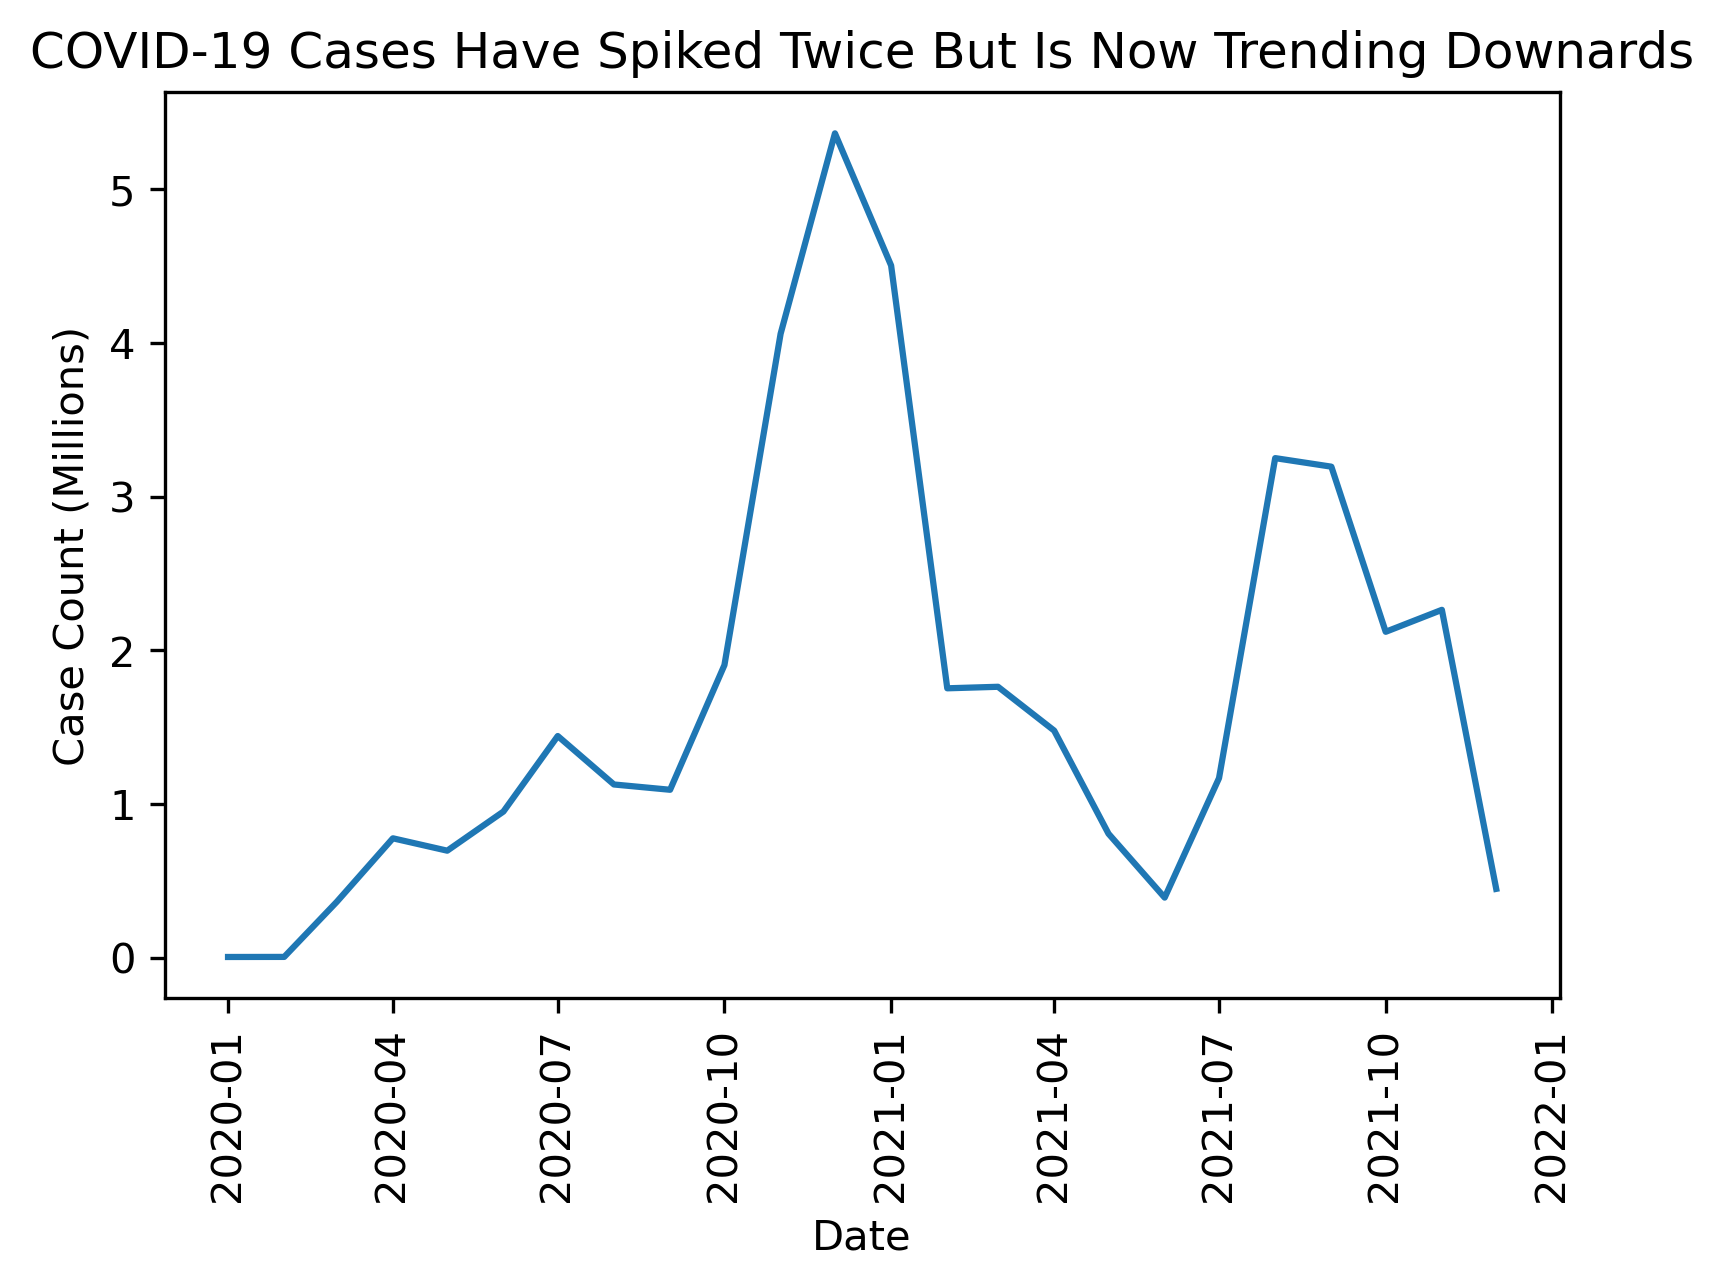

In [12]:
#covid cases trend
trend_df = covid_df.groupby(['case_month']).size().reset_index(name = 'case_count').set_index('case_month')
trend_df['case_count_millions'] = trend_df['case_count']/1000000
plt.plot(trend_df.index,trend_df['case_count_millions'])
plt.title('COVID-19 Cases Have Spiked Twice But Is Now Trending Downards')
plt.xlabel('Date')
plt.ylabel('Case Count (Millions)')
plt.xticks(rotation=90)
plt.show()

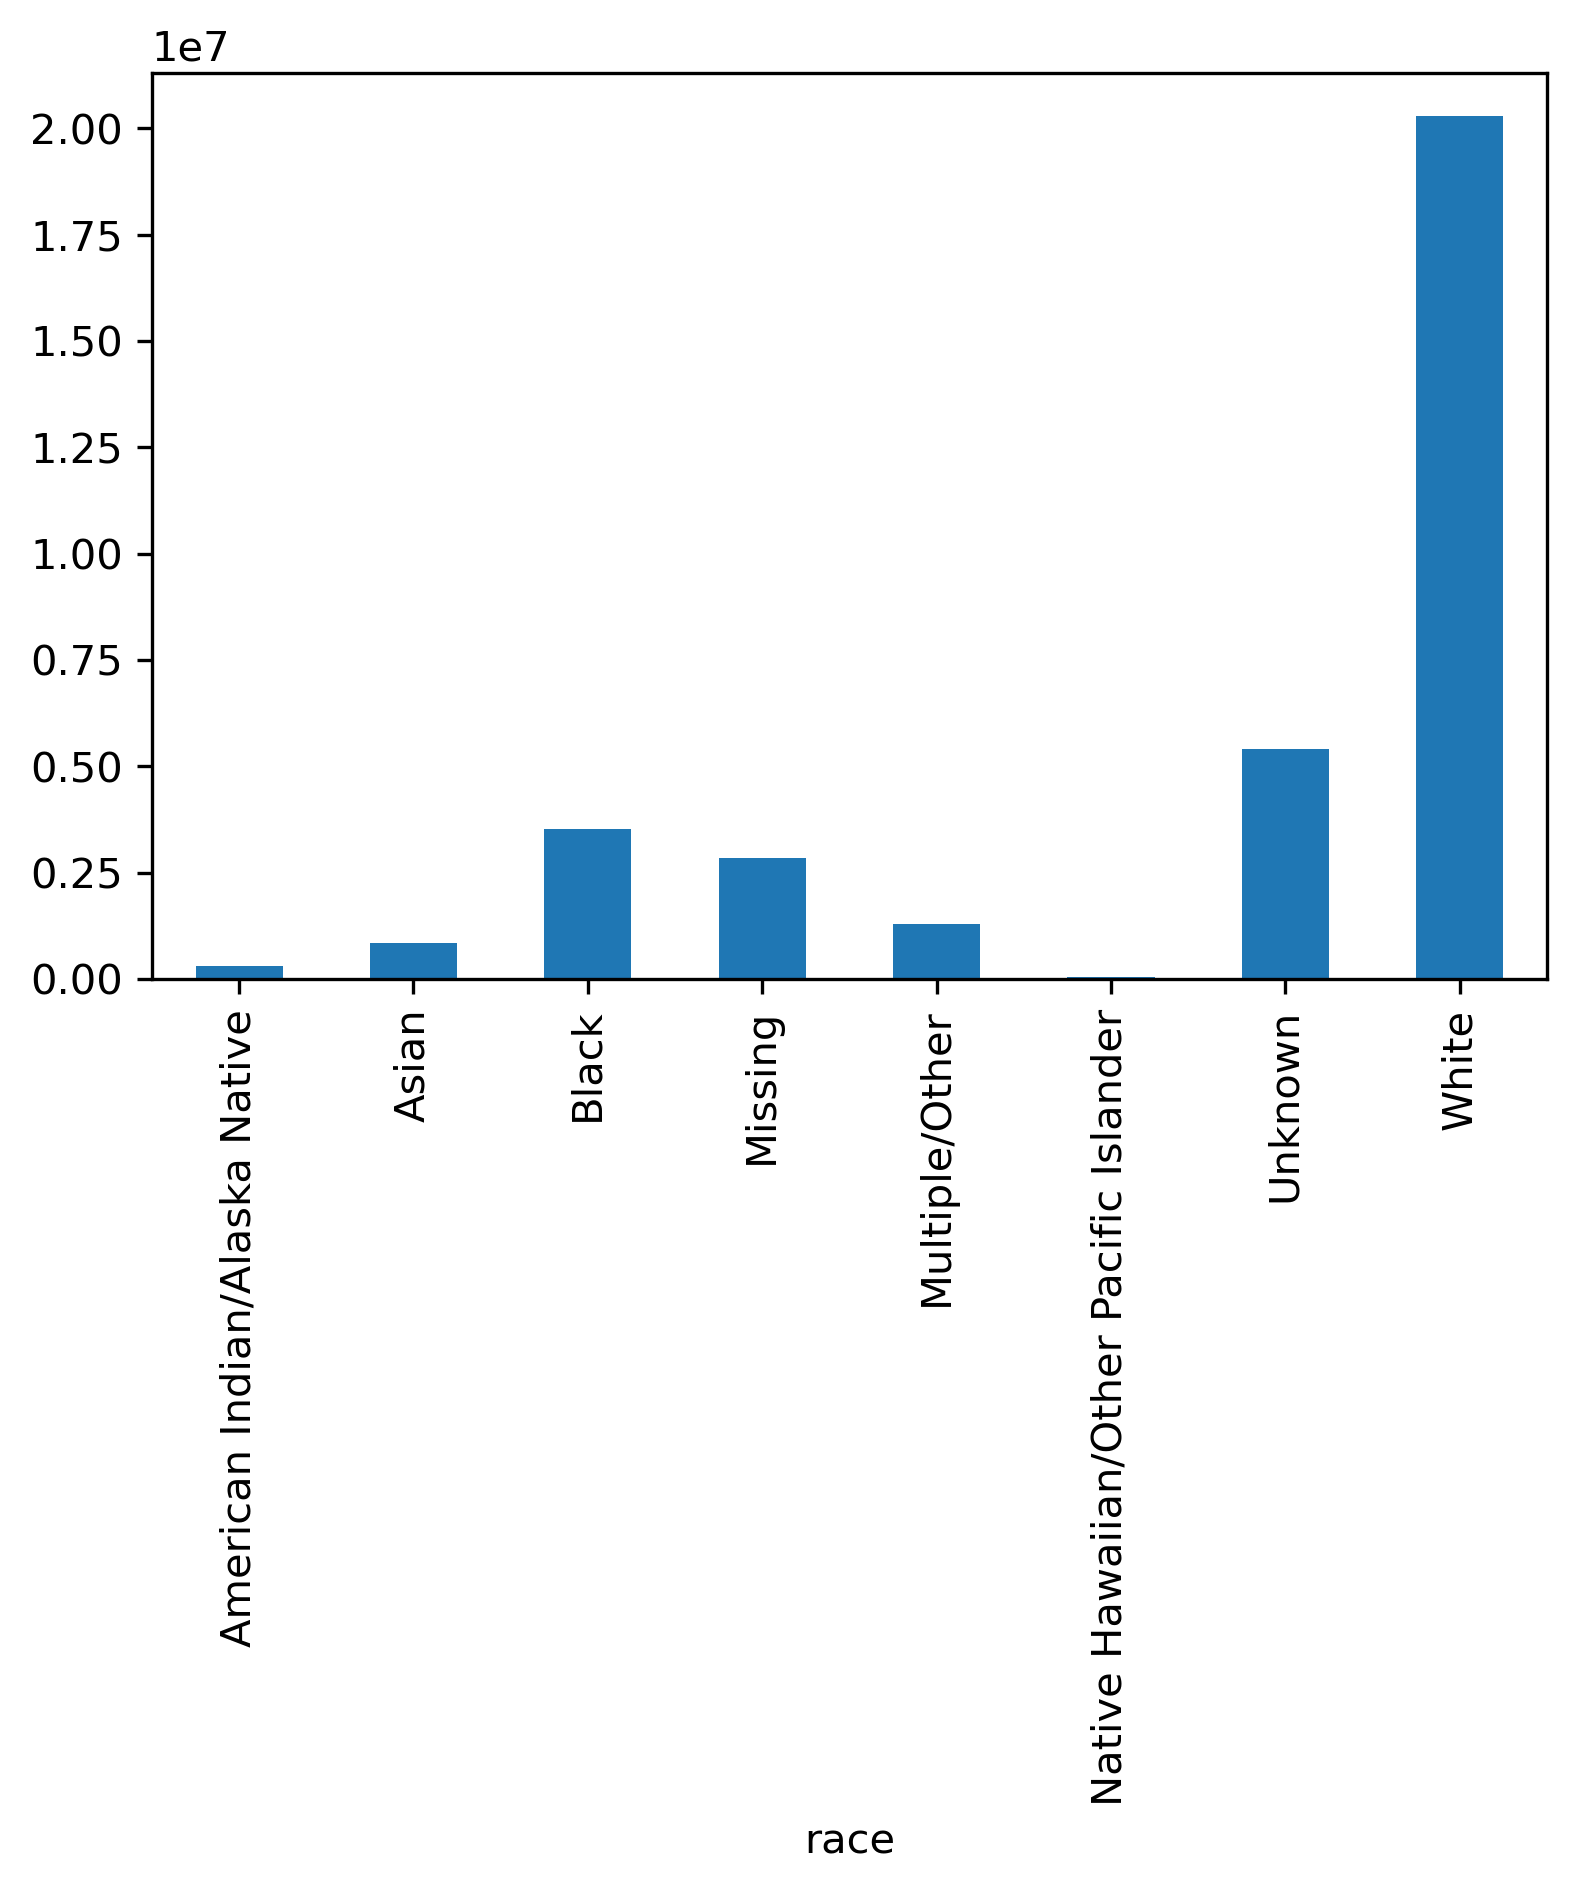

In [13]:
covid_df.groupby(['race']).size().plot.bar()
plt.show()

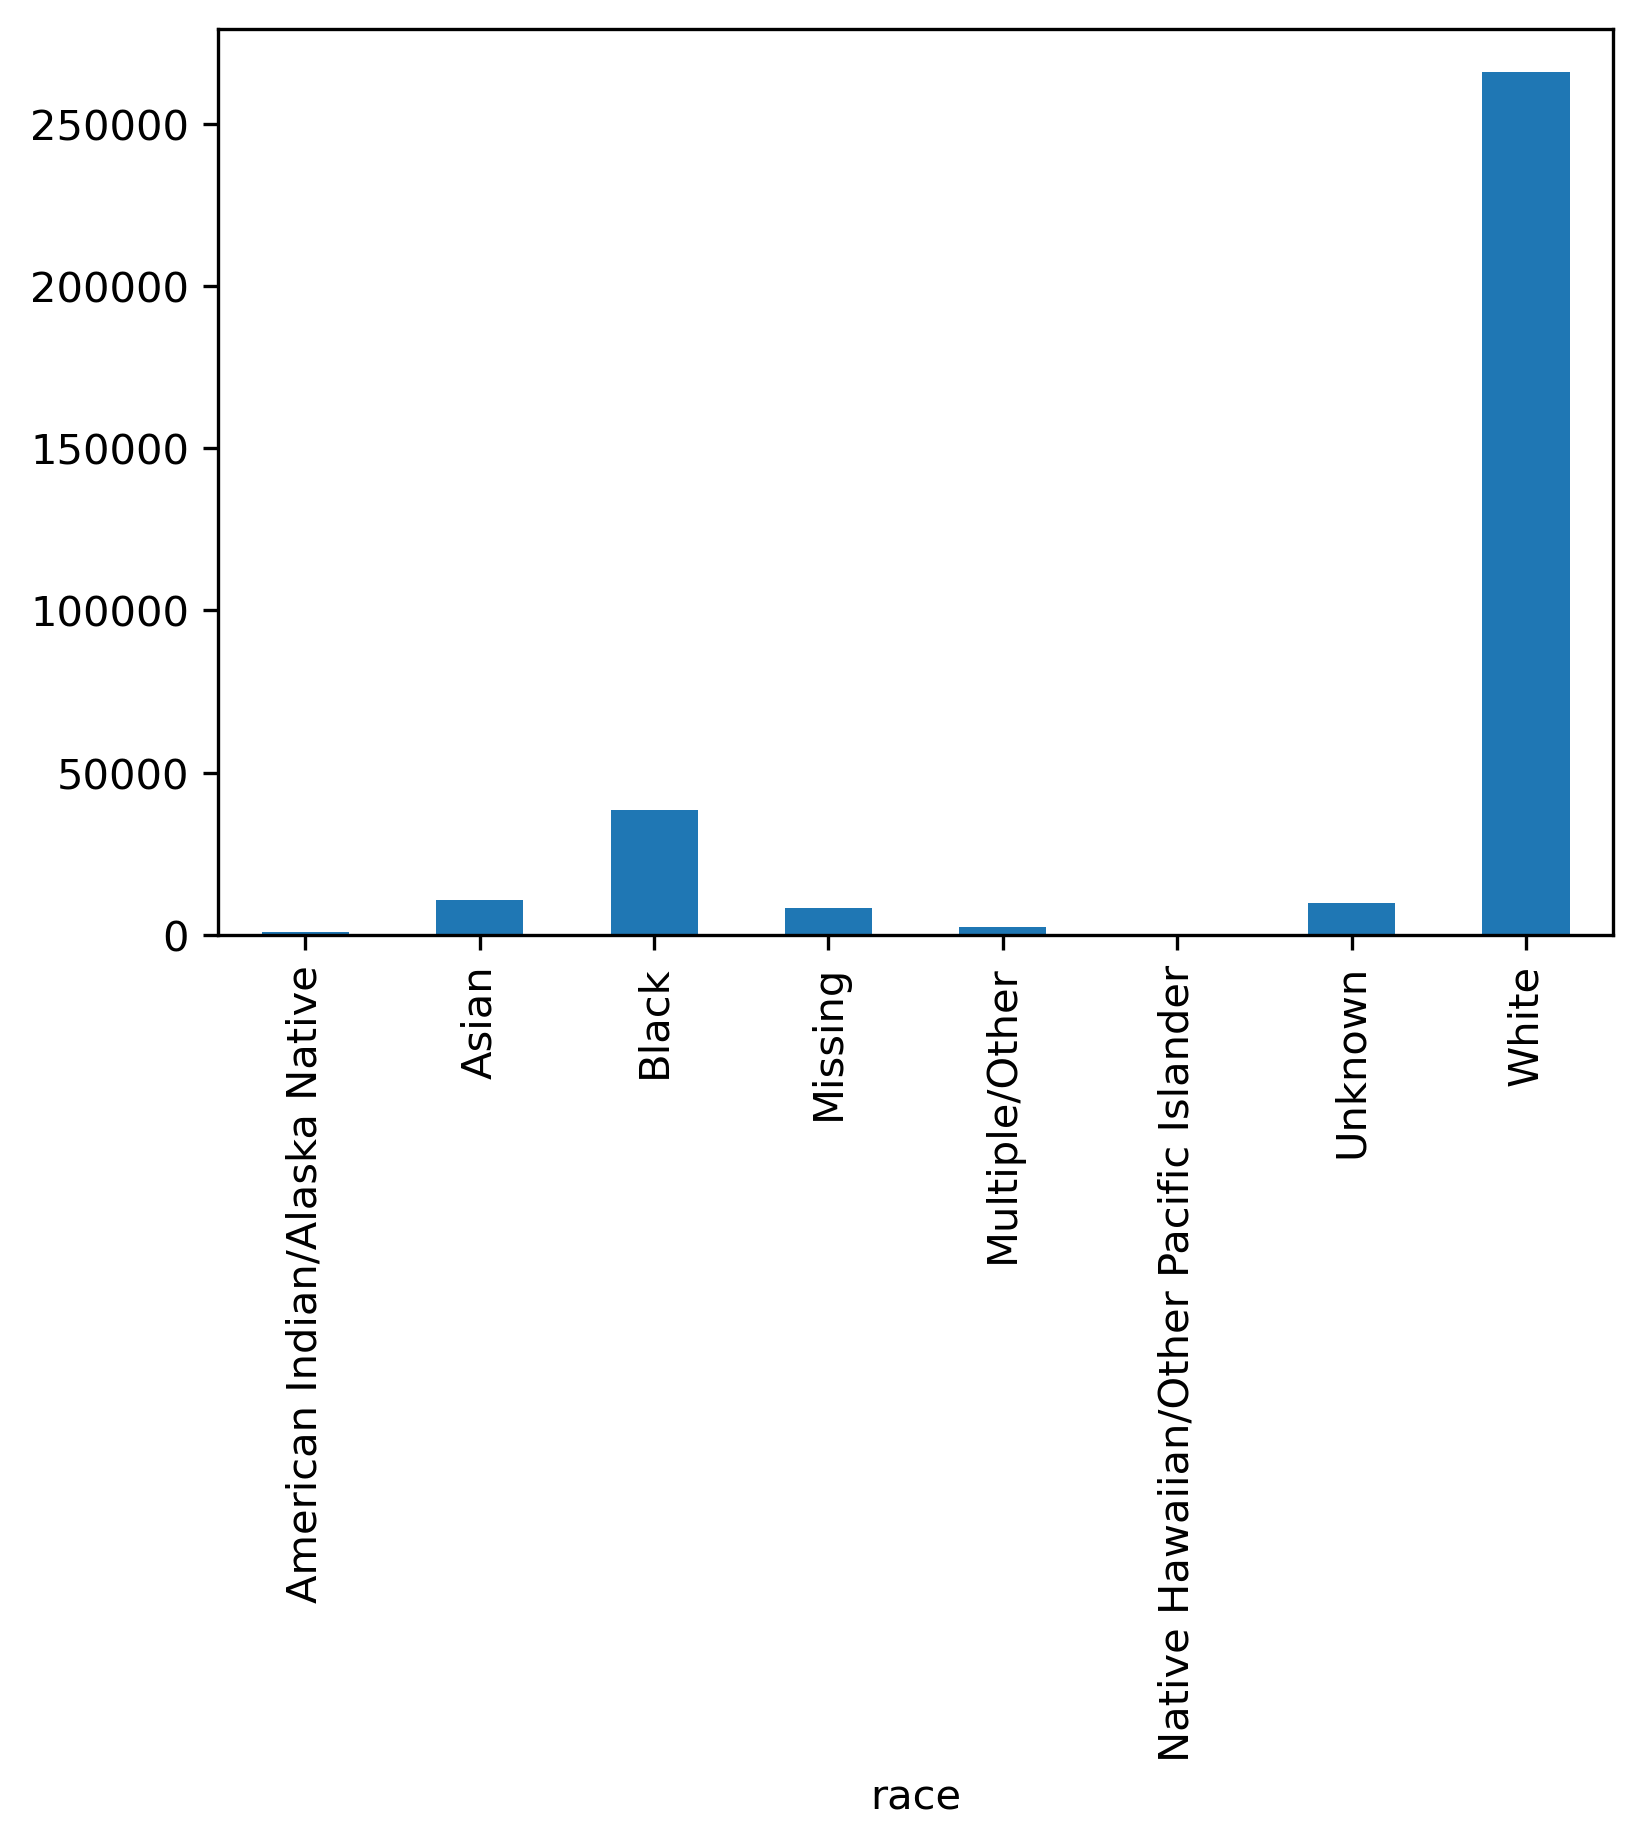

In [14]:
#death status per race
death_df = covid_df[covid_df['death_yn'] == 'Yes'] 
death_df.groupby(['race']).size().plot.bar()
plt.show()

In [15]:
#death status per state
death_df.groupby(['res_state']).size().reset_index(name = 'count')

,res_state,count
0,AK,25
1,AL,4213
2,AR,1655
3,AZ,15579
4,CA,60931
5,CO,6424
6,CT,4202
7,DC,627
8,FL,44673
9,GA,679
